In [1]:
import glob
import pandas as pd

frame = pd.DataFrame()
list_ = []
path =r'/home/shashank/Documents/location/Geolife Trajectories 1.3/Data' # use your path

for x in range(0, 21):
    k = "{0:0=3d}".format(x)
    allFiles = glob.glob(path + "/" + k + "/Trajectory/*.plt")
    for file_ in allFiles:
        df = pd.read_csv(file_,index_col=None, skiprows=6, header = None)
        df['UserName'] = k
        list_.append(df)

frame = pd.concat(list_)
frame.tail()


,0,1,2,3,4,5,6,UserName
803,39.978262,116.332392,0,0.0,40855.615405,2011-11-08,14:46:11,020
804,39.978258,116.332393,0,0.0,40855.615417,2011-11-08,14:46:12,020
805,39.978253,116.332387,0,0.0,40855.615428,2011-11-08,14:46:13,020
806,39.978247,116.332375,0,0.0,40855.615440,2011-11-08,14:46:14,020
807,39.978243,116.332373,0,0.0,40855.615451,2011-11-08,14:46:15,020


In [2]:
frame.columns = ['Latitude', 'Longitude', '0', 'Altitude', 'NumDays', 'Date', 'Time', 'Username']
frame.tail()

,Latitude,Longitude,0,Altitude,NumDays,Date,Time,Username
803,39.978262,116.332392,0,0.0,40855.615405,2011-11-08,14:46:11,020
804,39.978258,116.332393,0,0.0,40855.615417,2011-11-08,14:46:12,020
805,39.978253,116.332387,0,0.0,40855.615428,2011-11-08,14:46:13,020
806,39.978247,116.332375,0,0.0,40855.615440,2011-11-08,14:46:14,020
807,39.978243,116.332373,0,0.0,40855.615451,2011-11-08,14:46:15,020


In [3]:
frame["Timestamp"] = frame["Date"].map(str) + " " + frame["Time"]
frame.Timestamp = pd.to_datetime(frame.Timestamp)
frame.dtypes

Latitude            float64
Longitude           float64
0                     int64
Altitude            float64
NumDays             float64
Date                 object
Time                 object
Username             object
Timestamp    datetime64[ns]
dtype: object

In [4]:
frame.index = pd.to_datetime(frame.Timestamp)

In [5]:
frame.tail()

,Latitude,Longitude,0,Altitude,NumDays,Date,Time,Username,Timestamp
Timestamp,,,,,,,,,
2011-11-08 14:46:11,39.978262,116.332392,0,0.0,40855.615405,2011-11-08,14:46:11,020,2011-11-08 14:46:11
2011-11-08 14:46:12,39.978258,116.332393,0,0.0,40855.615417,2011-11-08,14:46:12,020,2011-11-08 14:46:12
2011-11-08 14:46:13,39.978253,116.332387,0,0.0,40855.615428,2011-11-08,14:46:13,020,2011-11-08 14:46:13
2011-11-08 14:46:14,39.978247,116.332375,0,0.0,40855.615440,2011-11-08,14:46:14,020,2011-11-08 14:46:14
2011-11-08 14:46:15,39.978243,116.332373,0,0.0,40855.615451,2011-11-08,14:46:15,020,2011-11-08 14:46:15


In [6]:

frame['Weekday'] = frame['Timestamp'].dt.weekday.map(str) + frame['Timestamp'].dt.weekday_name
frame = frame.sort_values(by=['Username', 'Weekday'])
frame.head()


,Latitude,Longitude,0,Altitude,NumDays,Date,Time,Username,Timestamp,Weekday
Timestamp,,,,,,,,,,
2009-05-25 09:36:47,40.005504,116.320902,0,492.0,39958.400544,2009-05-25,09:36:47,000,2009-05-25 09:36:47,0Monday
2009-05-25 09:36:52,40.005545,116.320827,0,492.0,39958.400602,2009-05-25,09:36:52,000,2009-05-25 09:36:52,0Monday
2009-05-25 09:36:57,40.005506,116.320835,0,493.0,39958.400660,2009-05-25,09:36:57,000,2009-05-25 09:36:57,0Monday
2009-05-25 09:37:01,40.005349,116.320945,0,493.0,39958.400706,2009-05-25,09:37:01,000,2009-05-25 09:37:01,0Monday
2009-05-25 09:37:06,40.007845,116.319570,0,61.0,39958.400764,2009-05-25,09:37:06,000,2009-05-25 09:37:06,0Monday


In [7]:
import numpy as np
import seaborn as sns

#weeklydf = frame[['Username', 'Weekday', 'Latitude']].groupby(['Username', 'Weekday'])['Latitude'].agg('count')
weeklydf = frame.pivot_table(values='Latitude', index='Username',columns='Weekday',aggfunc=len)
weeklydf
#bc['DAY_OF_WEEK'] = pd.Categorical(bc['DAY_OF_WEEK'], categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)


Weekday,0Monday,1Tuesday,2Wednesday,3Thursday,4Friday,5Saturday,6Sunday
Username,,,,,,,
000,19608.0,24148.0,15070.0,26835.0,27528.0,30351.0,30330.0
001,10555.0,14077.0,14849.0,10198.0,11667.0,30376.0,16885.0
002,25841.0,28301.0,28199.0,33657.0,30891.0,57103.0,44225.0
003,58713.0,69541.0,56756.0,64411.0,83037.0,79723.0,73045.0
004,49590.0,54835.0,57480.0,65973.0,66348.0,73945.0,71226.0
005,10335.0,18211.0,18858.0,11563.0,19532.0,18737.0,11810.0
006,394.0,156.0,4341.0,5696.0,5758.0,7172.0,8313.0
007,5442.0,13969.0,12596.0,10574.0,14465.0,15349.0,14822.0
008,6884.0,8421.0,23633.0,7468.0,9721.0,16597.0,5186.0


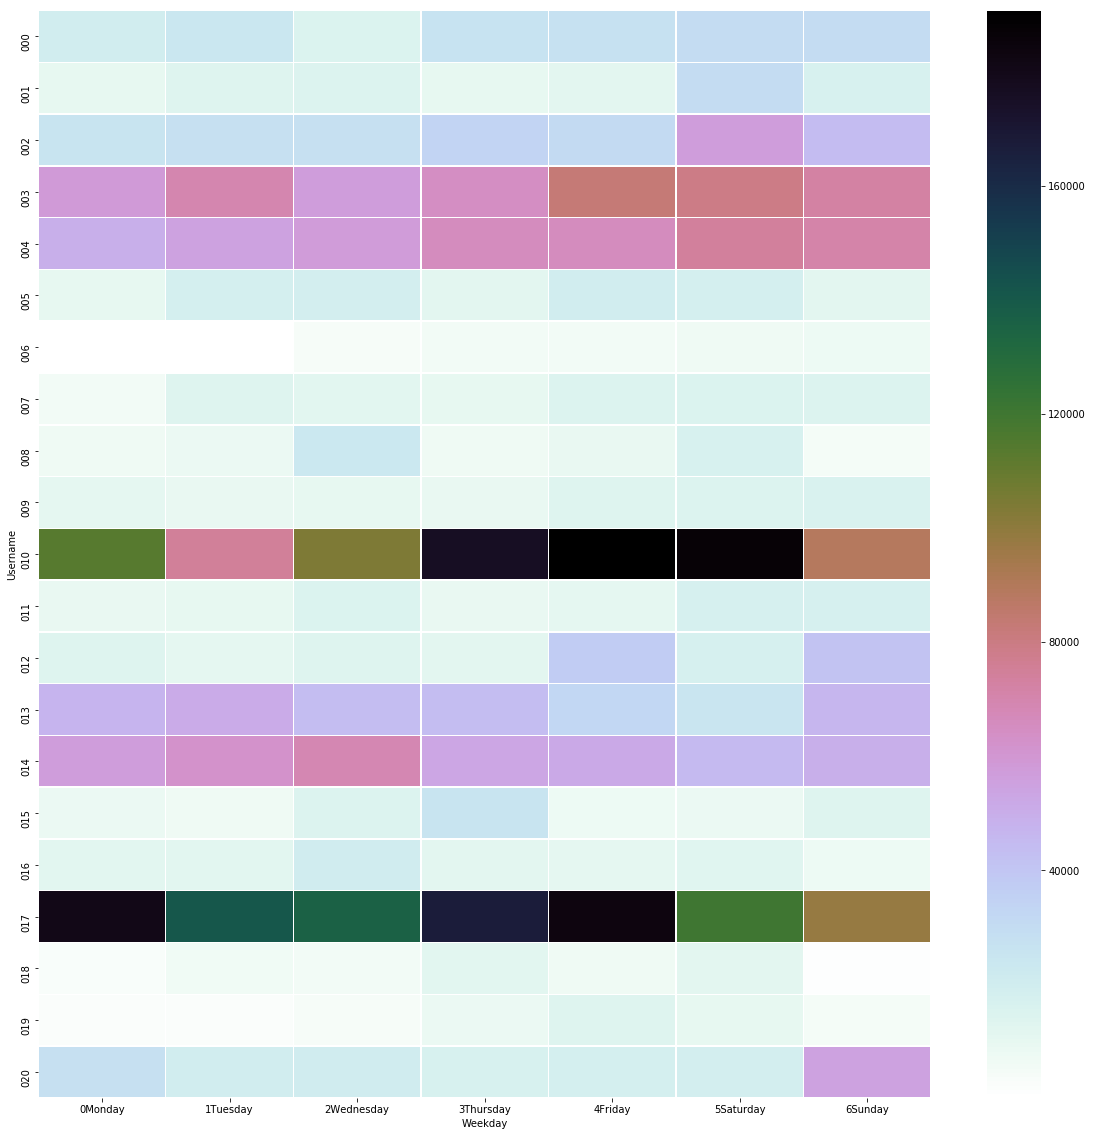

In [8]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

colormap = pyplot.cm.cubehelix_r
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(weeklydf, cmap=colormap, linewidths=.5, ax=ax)
#sns.heatmap(weeklydf, cmap="YlGnBu", linewidths=.5, ax=ax)